In [304]:
#DSC680 Project 1 CKD Prevalence and Awareness
#Christine Orosco 1/1/2023
'''
Data shows that Chronic Kidney Disease (CKD) is on the rise and affects 1 out 3 adults with diabetes and 1 out of 5 adults with high blood pressure
(Chronic Kidney Disease (CKD) Surveillance System, n.d.-b).  But CKD doesn’t seem to have the same kind of wide-spread attention as diabetes and high blood pressure.

Study Objective:
Should CKD be included as a major leading cause of death?
What are the prevalence and awareness levels?
If any, what accounts for the disparities in the prevalence and awareness levels?

'''

'\nData shows that Chronic Kidney Disease (CKD) is on the rise and affects 1 out 3 adults with diabetes and 1 out of 5 adults with high blood pressure\n(Chronic Kidney Disease (CKD) Surveillance System, n.d.-b).  But CKD doesn’t seem to have the same kind of wide-spread attention as diabetes and high blood pressure.\n\nStudy Objective:\nShould CKD be included as a major leading cause of death?\nIs the lack of dissemination due to lack of awareness of the disease or the insufficient active monitoring of patients with high risk factors?\n\n'

In [305]:
import pandas as pd

In [306]:
# Graph the prevalence of CKD by State
# Import the Prevalence_of_CKD_by_US_State_and_County_by_County_2019.xlsx from the CDC renamed to state_data.xlsx

In [307]:
df = pd.read_excel('state_data.xlsx', header=0)

In [308]:
# Drop the rows where the year <=2009

df.drop(df.loc[df['Year']<= 2009].index, inplace=True)


In [309]:
#Need to aggregate the values for each county in each state and compute the mean
## Ckd prevalence by State per year (mean)
ckd_prev = df.groupby(['State','Year']).agg('Main Value').mean().reset_index()


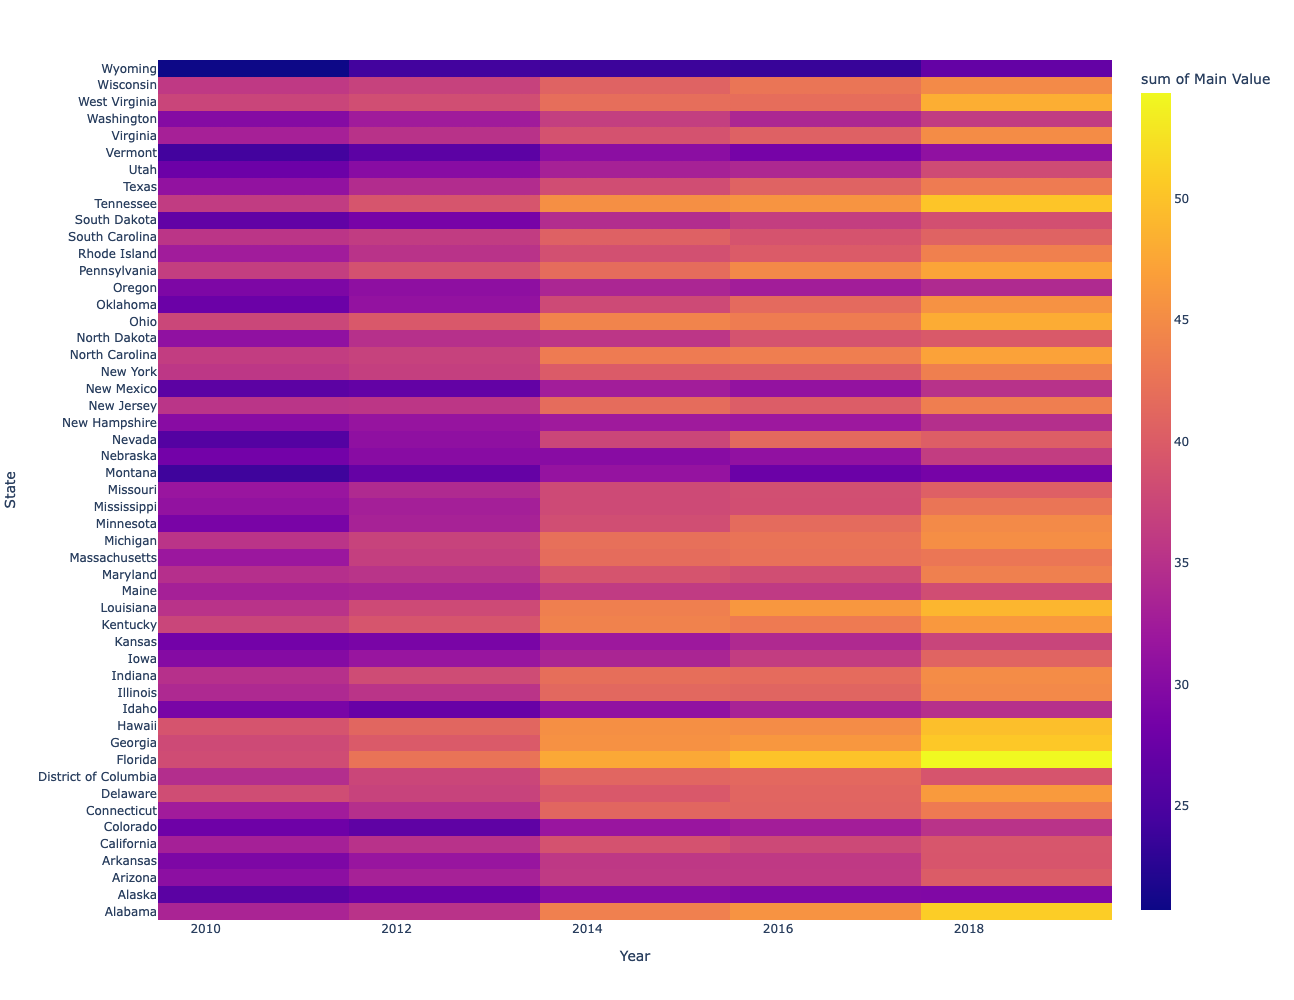

In [310]:
# Ckd prevalence by State per year
fig=px.density_heatmap(data_frame=ckd_prev,
                       x='Year',
                       y='State',
                       z='Main Value',
                      height=1000,
                      width=900,
                      template='plotly_white')
fig.show()


In [311]:
# CKD Prevalence for all states from 2010-2019

In [312]:
ckd_all = df.groupby(['Year']).agg('Main Value').mean().reset_index()
ckd_all

,Year,Main Value
0,2010,15.92
1,2011,16.56
2,2012,17.04
3,2013,17.50
4,2014,18.04
5,2015,20.86
6,2016,19.38
7,2017,20.42
8,2018,21.08
9,2019,22.01


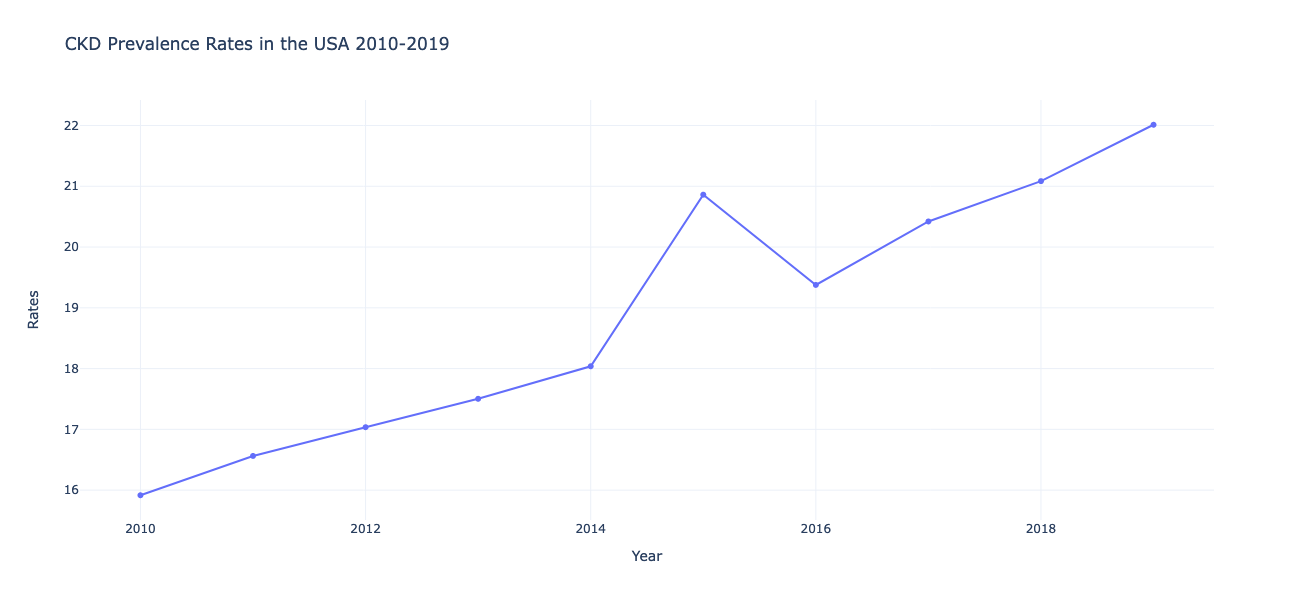

In [313]:
fig = px.line(ckd_all, x="Year", y="Main Value",
              title='CKD Prevalence Rates in the USA 2010-2019',
              template='plotly_white',
              markers=True,
              labels={'Main Value':'Rates'},
              height=600, width=1100)
              
              

fig.show()

In [ ]:
# Get death rates for ckd, heart disease and diabetes for comparison
# Center for Disease Control -Stats by the States tables

In [314]:
hd = pd.read_csv('HD_death_rates_states.csv', header=0)

In [315]:
dd = pd.read_csv('DD_data_table.csv', header=0)

In [316]:
dd.drop(dd.loc[dd['YEAR']<= 2009].index, inplace=True)


In [317]:
# Create a subset to display latest year's data via chloropeth map


In [318]:
hd.drop(hd.loc[hd['YEAR']<= 2009].index, inplace=True)


In [319]:
ckd = pd.read_csv('ckd_deaths.csv', header=0)

In [320]:
ckd.drop(ckd.loc[ckd['YEAR']<= 2009].index, inplace=True)


In [321]:
import plotly.express as px
import plotly.graph_objects as go

In [322]:
# Create a subset to display latest year's data via chloropeth map

In [323]:
subset = ckd.loc[ckd['YEAR'] == 2020]


In [324]:
subset2 = hd.loc[hd['YEAR'] == 2020]


In [325]:

subset3 = dd.loc[dd['YEAR'] == 2020]


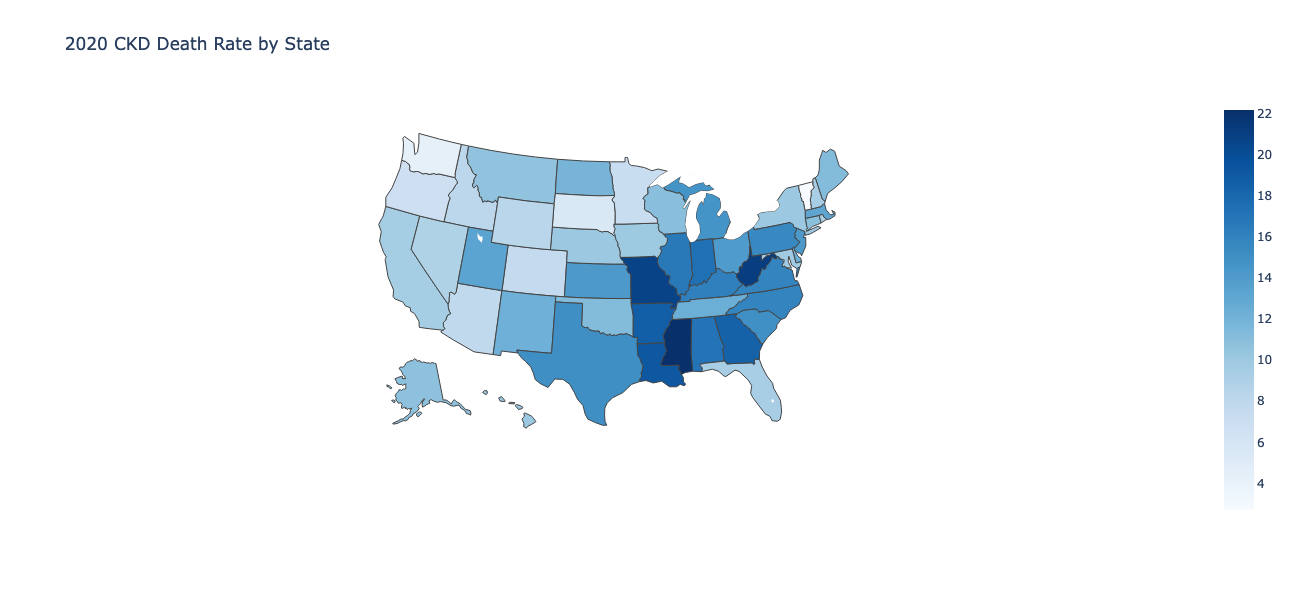

In [326]:
fig = go.Figure(data=go.Choropleth(
                    locations=subset["STATE"],  # DataFrame column with locations
                    z=subset["RATE"],  # DataFrame column with color value
                    colorscale = "Blues",
                    locationmode = 'USA-states')) # Set to plot as US States

fig.update_layout(
    title_text = '2020 CKD Death Rate by State',
    geo_scope='usa', # limit map scope to USA
    width=900, height=600)

fig.show()  # Output the plot to the screen



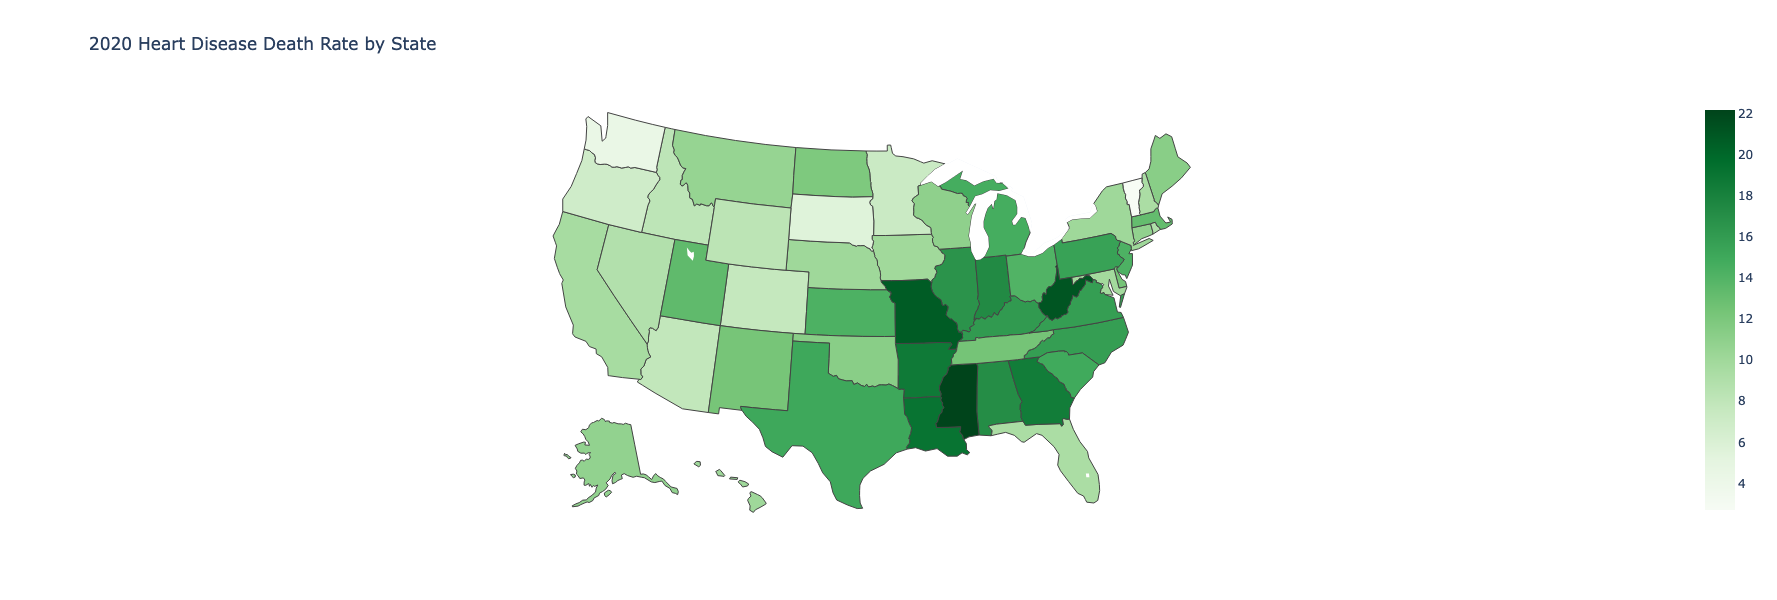

In [327]:
fig = go.Figure(data=go.Choropleth(
                    locations=subset2["STATE"],  # DataFrame column with locations
                    z=subset["RATE"],  # DataFrame column with color value
                    colorscale = "Greens",
                    locationmode = 'USA-states')) # Set to plot as US States

fig.update_layout(
    title_text = '2020 Heart Disease Death Rate by State',
    geo_scope='usa', # limit map scope to USA
    width=900, height=600)

fig.show()  # Output the plot to the screen

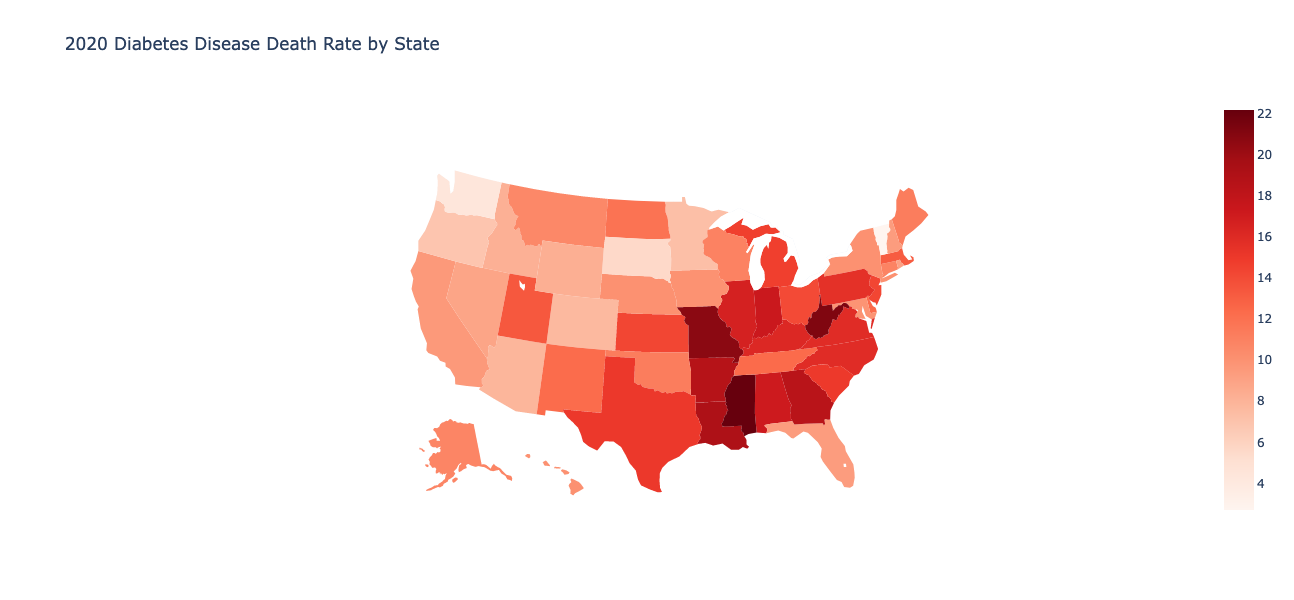

In [328]:
fig = go.Figure(data=go.Choropleth(
                    locations=subset["STATE"],  # DataFrame column with locations
                    z=subset["RATE"],  # DataFrame column with color value
                    colorscale = "Reds",
                    
                    marker_line_width=0,
                    locationmode='USA-states'))
                    # Set to plot as US States


    
fig.update_layout(
                  title_text = '2020 Diabetes Disease Death Rate by State',
                    geo_scope='usa', # limit map scope to USA
                    width=900, height=600)



fig.show()  # Output the plot to the screen

In [329]:
# group df by year, total the rate value and compute the mean

def groupby_year(df):
    disp = df.groupby(['YEAR']).agg('RATE').mean().reset_index(name='Mean')
    return (disp)



In [330]:
ckd_disp = groupby_year(ckd)
hd_disp = groupby_year(hd)
dd_disp = groupby_year(dd)


In [381]:
# Create combined data frame
#ckd_disp['Disease'] = "CKD"
#dd_disp['Disease'] = "Diabetes"
hd_disp['Disease'] = "Heart Disease"

In [382]:
combo = [hd_disp, dd_disp, ckd_disp]

In [383]:
# Concat dataframes
new_df = pd.concat(combo, axis=0)

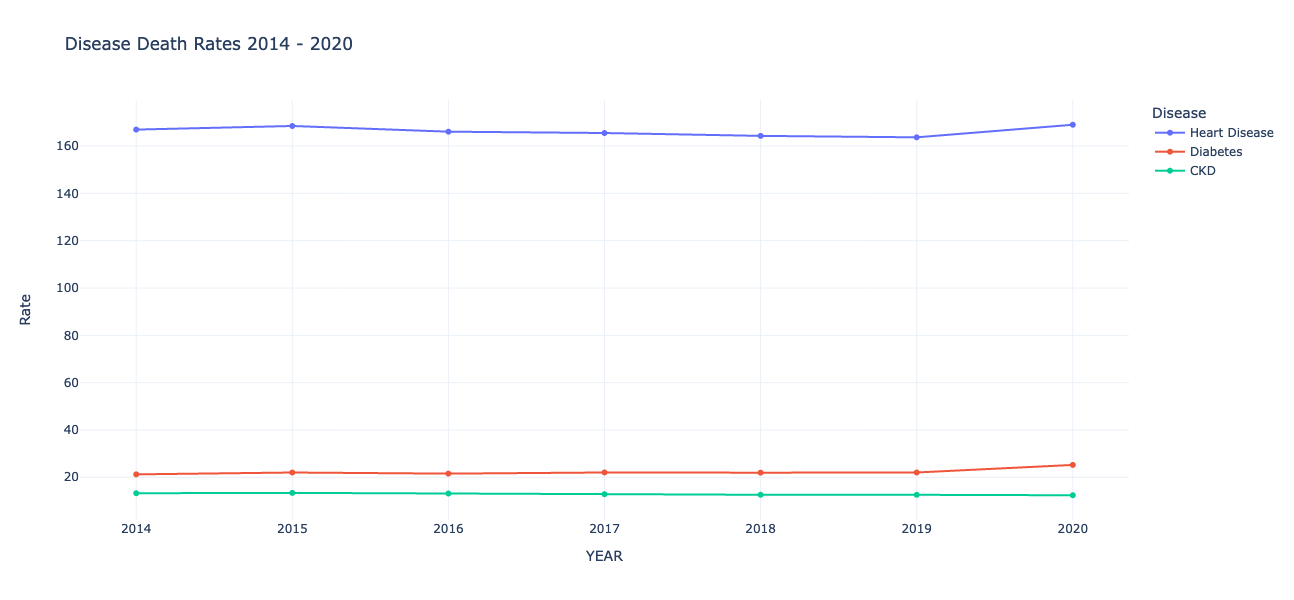

In [384]:
# Display Death rates by Year

fig = px.line(new_df, x="YEAR", y="Mean",
              title='Disease Death Rates 2014 - 2020',
              template='plotly_white',
              markers=True,
              color='Disease',
              labels={'Mean':'Rate'},
              height=600, width=1100)
              
              

fig.show()

In [259]:
# Nhanes characteristics (prevalence)
import os
import pandas as pd
os.getcwd()

'/Users/corosco/DSC680/Project 1'

In [92]:
#pd.reset_option('display.float_format')

In [ ]:
#Read in the NHANES file to capture demographics data

In [332]:
nhanes = pd.read_excel('nhanes_chars.xlsx', header=0)

In [333]:
pd.set_option('display.float_format', lambda x: '%0.0f' % x)

In [334]:
subset = nhanes.iloc[1:,0:]

In [335]:
subset.rename(columns={'catgegory':'Category'}, inplace = True)
subset

,attribute,2017-Mar. 2020,2013-2016,2009-2012,2005-2008,Category
1,20-44 years,44,45,46,48,age
2,45-54 years,16,18,19,22,age
3,55-64 years,19,17,17,14,age
4,65-74 years,13,12,10,9,age
5,75+ years,8,8,7,8,age
6,Female,52,52,52,52,sex
7,Male,48,48,48,48,sex
8,White,63,65,67,71,ethnicity
9,Black,11,11,11,11,ethnicity
10,Hispanic,16,15,14,12,ethnicity


In [336]:
# Compute the delta from 2009 till 2020 for all characteristics
subset['Delta'] = subset['2017-Mar. 2020'] - subset['2009-2012']

In [337]:
subset.rename(columns={'attribute':'Attribute'}, inplace = True)

In [338]:

#fig2 = px.bar(subset, x='2017-Mar. 2020', y='attribute',  title='2017 - Mar 2020 Nhanes Characteristics',
#               width=600, height=600)

#fig2.update_layout(uniformtext_minsize=8, color='category', uniformtext_mode='hide', autosize=False, title_x=0.7, title_font_family ="Calibri")


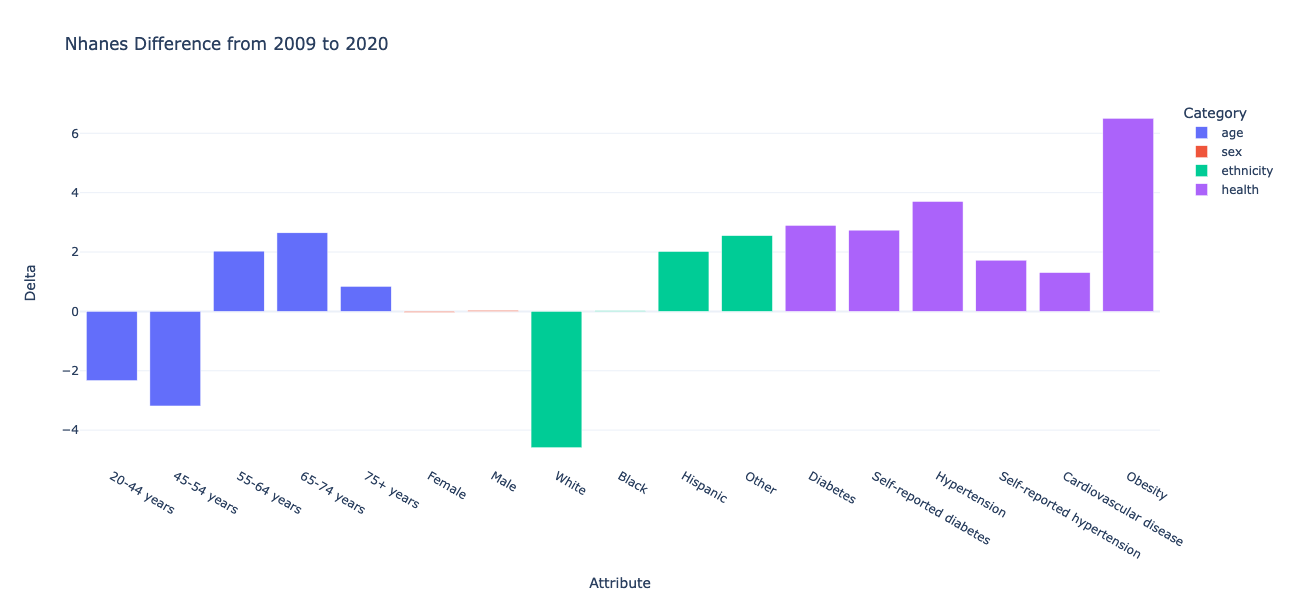

In [339]:
# Difference from 2009 to 2020

fig = px.bar(subset, x='Attribute', y='Delta',
             color='Category',
             template='plotly_white',
             title='Nhanes Difference from 2009 to 2020', height=600, width=1000)
fig.show()

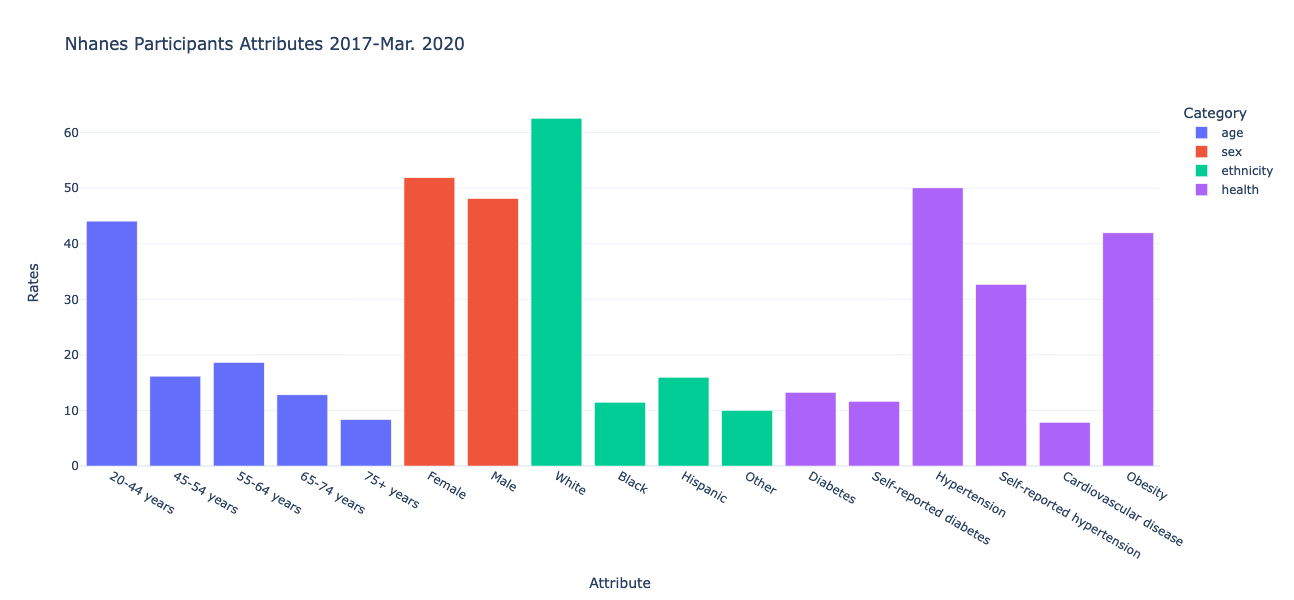

In [340]:
#2017 to 2020 values
fig = px.bar(subset, x='Attribute', y='2017-Mar. 2020',
             template='plotly_white', color='Category',
             title='Nhanes Participants Attributes 2017-Mar. 2020', height=600, width=1000,
             labels={'2017-Mar. 2020':'Rates'})
fig.show()

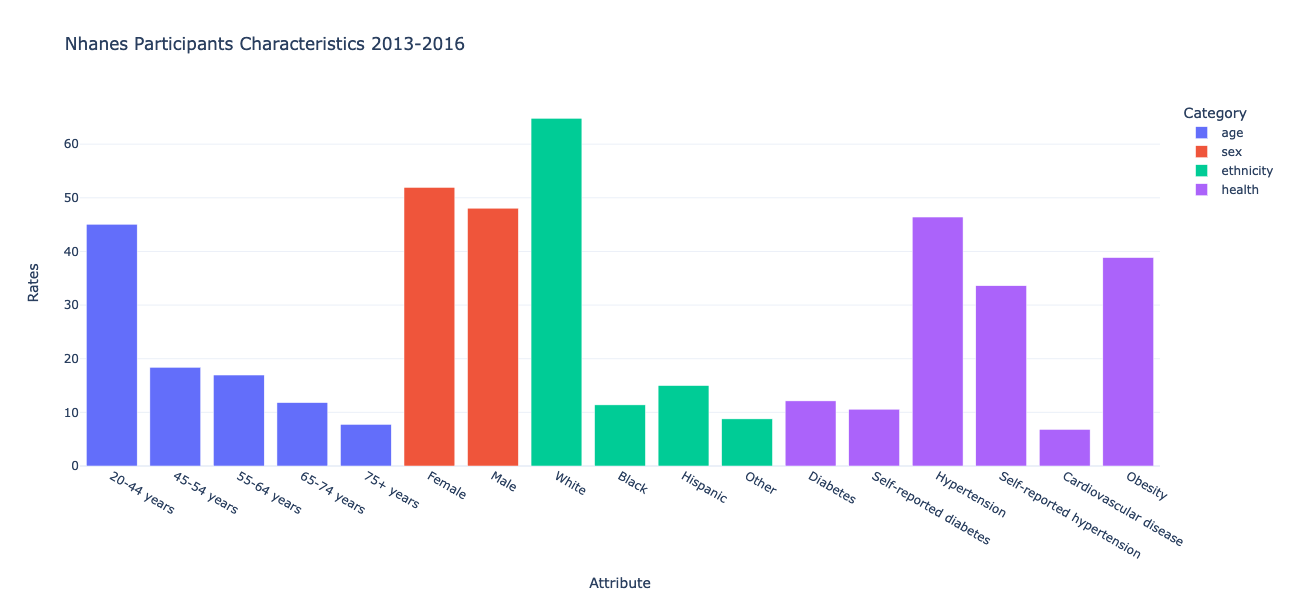

In [341]:
#2013-2016 values
fig = px.bar(subset, x='Attribute', y='2013-2016',
             template='plotly_white', color='Category',
             title='Nhanes Participants Characteristics 2013-2016', height=600, width=900,
             labels={'2013-2016':'Rates'})
fig.show()

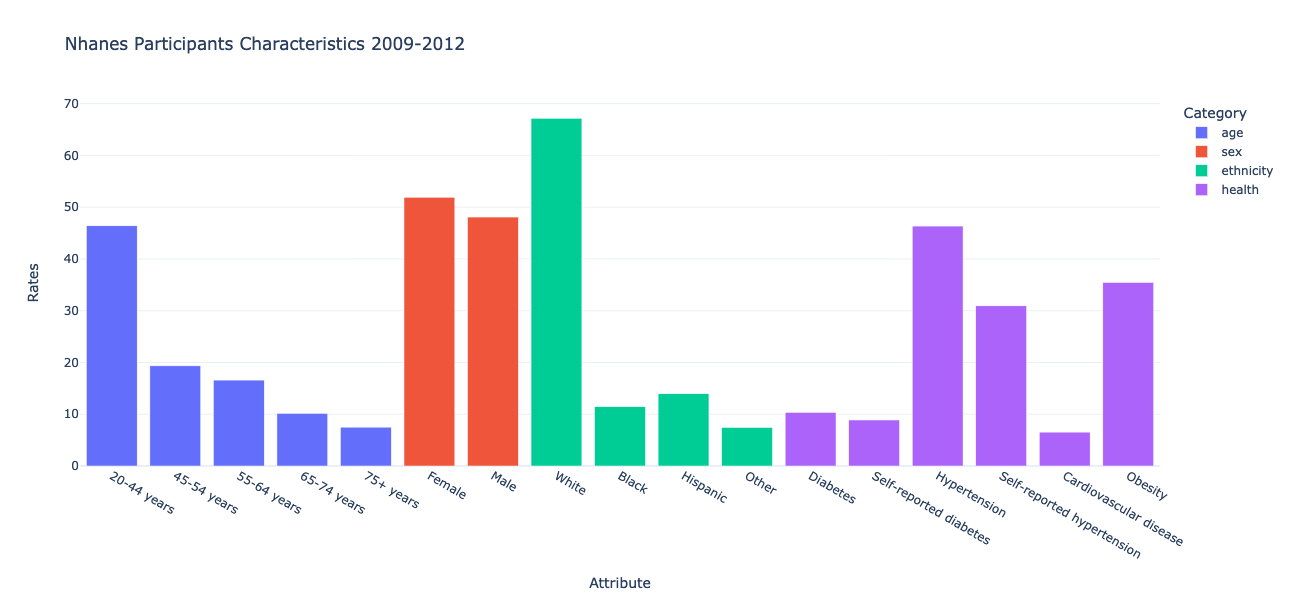

In [342]:
#2009-2012 values
fig = px.bar(subset, x='Attribute', y='2009-2012',
             template='plotly_white',
             hover_data=['2009-2012'], color='Category',
             labels={'2009-2012':'Rates'},
             title='Nhanes Participants Characteristics 2009-2012', height=600, width=1000)
             
fig.show()

In [343]:
# Awareness  of ckd by Year and Stage

ckd_aware = pd.read_excel('ckd_rates.xlsx', header=0)

In [344]:
 ckd_aware.drop(ckd_aware.loc[ckd_aware['Year'] == "1999–2000"].index, inplace=True)

In [345]:
pd.set_option('display.float_format', lambda x: '%0.2f' % x)

In [368]:
ckd_aware.head(10)

,Rate,Year,CKD Stage
4,11.74,2001–2002,All Stage 3/4
5,32.84,2001–2002,eGFR 15–29
6,16.08,2001–2002,eGFR 30–44
7,8.48,2001–2002,eGFR 45–59
8,11.87,2001-2004,All Stage 3/4
9,35.68,2001-2004,eGFR 15–29
10,18.65,2001-2004,eGFR 30–44
11,7.80,2001-2004,eGFR 45–59
12,11.98,2003–2004,All Stage 3/4
13,37.15,2003–2004,eGFR 15–29


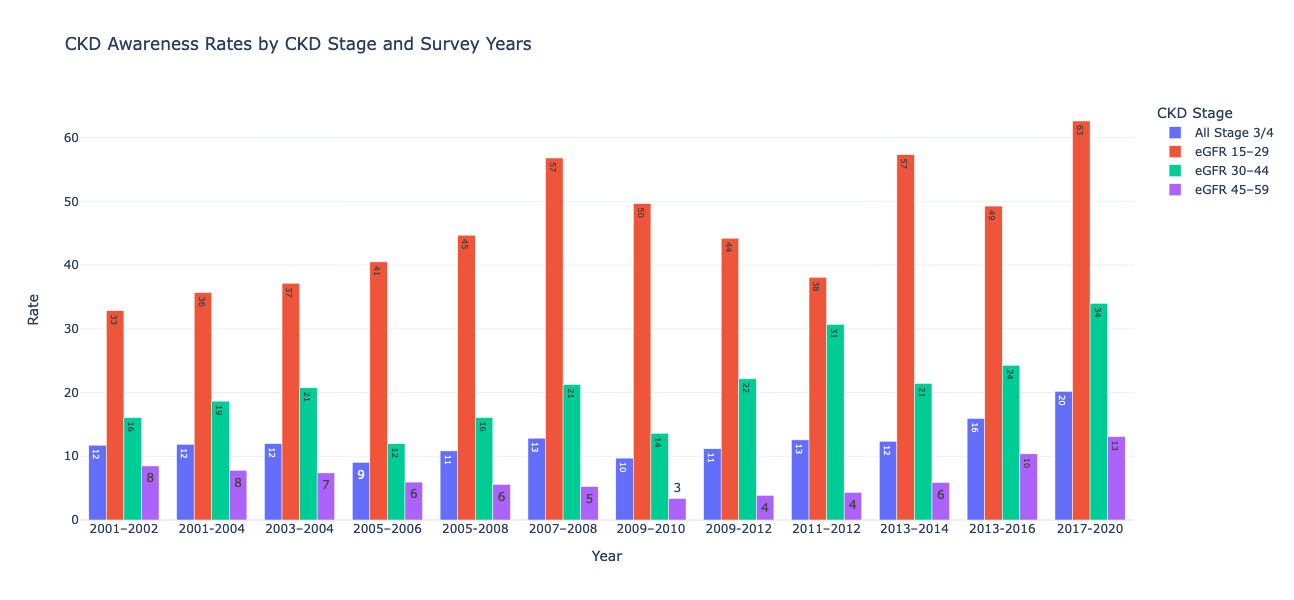

In [346]:
#Plot ckd_aware https://nccd.cdc.gov/ckd/detail.aspx?Qnum=Q98 Centers for Disease Control and Prevention.
# Chronic Kidney Disease Surveillance System—United States. website. http://www.cdc.gov/ckd
#The National Health and Nutrition Examination Survey (NHANES) is a nationally representative,
# cross-sectional survey that is currently conducted every 2 years by the Centers for Disease Control
# and Prevention's National Center for Health Statistics to examine disease prevalence
# and trends over time in noninstitutionalized U.S. civilian residents.

ckd_aware.rename(columns={'Main Value':'Rate'}, inplace = True)

title1 = "$\\text{CKD Awareness All Stages} ^ {x}$"
fig = px.bar(ckd_aware, x='Year',
             #text_auto='.0f',
              y='Rate',
              color='CKD Stage',
               text_auto='.0f',
               template='plotly_white',
               title='CKD Awareness Rates by CKD Stage and Survey Years',
               height=600, width=1100,
               barmode='group')

          
             


fig.show()

In [347]:
# CKD Awareness and Comorbidity
# https://nccd.cdc.gov/CKD/detail.aspx?Qnum=Q98&Strat=Year%2c+Diabetes
#awareness_of_CKD_Among_US_Adults_with_CKD_3_or_4 with and without Diabetes and Hypotension
#Percentage with CKD Stage 3 or 4 Who Were Aware of Their Disease
#Centers for Disease Control and Prevention. Chronic Kidney Disease Surveillance System—United States. website. http://www.cdc.gov/ckd

dh_aware = pd.read_excel('dd_aware.xlsx', header=0)

In [348]:
dh_aware.rename(columns={'Main Value':'Rate'}, inplace = True)


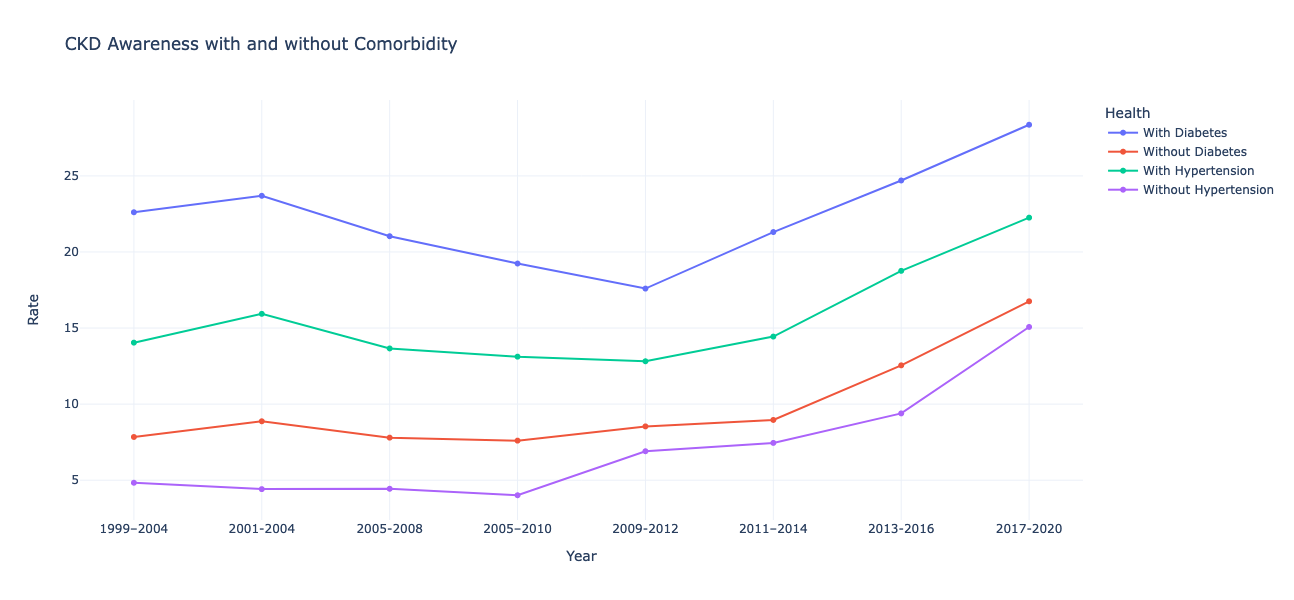

In [349]:
fig = px.line(dh_aware, x="Year", y="Rate",
              title='CKD Awareness with and without Comorbidity',
              color='Health',
              template='plotly_white',
              markers=True,
              height=600, width=1100)
              
              

fig.show()

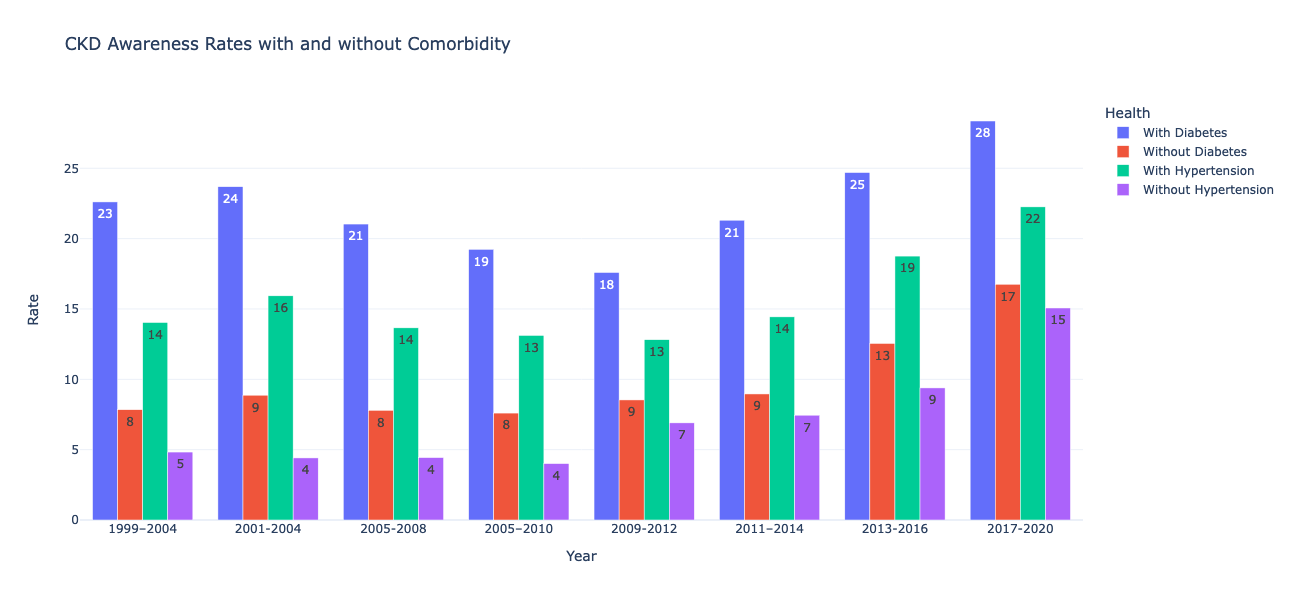

In [350]:

fig = px.bar(dh_aware, x='Year',
             text_auto='.0f',
              y='Rate',
              color='Health',
              template='plotly_white',
               title = 'CKD Awareness Rates with and without Comorbidity',
               height=600, width=1000,
               barmode='group')


          
            
fig.show()

In [351]:
#Ckd prevalence by Stage
ckd_prev = pd.read_excel('ckd_prev.xlsx', header=0)

In [352]:

ckd_prev.drop(ckd_prev.loc[ckd_prev['Year'] <= '1999'].index, inplace=True)

fig = px.bar(ckd_prev, x='Year',
             text_auto='.0f',
              y='Main Value',
              color='CKD Stage',
              template='plotly_white',
               title = 'CKD Prevalence Rates',
               height=600, width=1000,
               barmode='group',
               labels={'Main Value':'Rate'})


          
            
fig.show()

In [355]:
#ckd comorbidity
# Comorbidity in chronic kidney disease: a large cross-sectional study of prevalence in Scottish primary care
'''
MacRae, C., Mercer, S. W., Guthrie, B., & Henderson, D. (2021). 
Comorbidity in chronic kidney disease: a large cross-sectional 
study of prevalence in Scottish primary care. The British journal 
of general practice : the journal of the Royal College of 
General Practitioners, 71(704), e243–e249. https://doi.org/10.3399/bjgp20X714125



Cross-sectional analysis of a primary care dataset representing 1 274 374 adults in Scotland.
This study was a secondary analysis of general practice electronic medical record data using binary logistic 
regression models adjusted for age, sex, and socioeconomic status. Data of adults aged ≥25 years and 40 long-term conditions were used.
'''



'\nMacRae, C., Mercer, S. W., Guthrie, B., & Henderson, D. (2021). \nComorbidity in chronic kidney disease: a large cross-sectional \nstudy of prevalence in Scottish primary care. The British journal \nof general practice : the journal of the Royal College of \nGeneral Practitioners, 71(704), e243–e249. https://doi.org/10.3399/bjgp20X714125\n\n\n\nCross-sectional analysis of a primary care dataset representing 1 274 374 adults in Scotland.\nThis study was a secondary analysis of general practice electronic medical record data using binary logistic \nregression models adjusted for age, sex, and socioeconomic status. Data of adults aged ≥25 years and 40 long-term conditions were used.\n'

In [356]:
# Create dataset from report table
data = {'Age_group':['25-34', '35-44', '45-54','55-64', '65-74', '75-84', '85-plus'],
        'CKD_Rate':[0.3, 1.3,3.1,10.5,27.2,39.4,18.1],
        'No_CKD':[18.5,22.5,20.4,17.4,11.8,6.9,2.5]}
s_ckd = pd.DataFrame(data)

In [357]:
s_ckd

,Age_group,CKD_Rate,No_CKD
0,25-34,0.30,18.50
1,35-44,1.30,22.50
2,45-54,3.10,20.40
3,55-64,10.50,17.40
4,65-74,27.20,11.80
5,75-84,39.40,6.90
6,85-plus,18.10,2.50


In [358]:
'''
Markedly higher levels of comorbidity were found in people with CKD
compared with controls (98.2% versus 51.8%)
in both unadjusted analysis and age-, sex-, and deprivation-adjusted
comparisons. Strikingly, only 1.8% of people with CKD had no comorbidities, compared with 48.2% in the control group (Table 2). 

'''
data2 = {'Comorbid_group':['0', '1', '2-3','4-6', '7-plus'],
        'CKD_Comorbid_Rate':[2.4, 13.0,42.1,36.0,6.6],
        'No_CKD_Comorbid_Rate':[53.9,22.2,17.8,5.6,0.5]}
phy_ckd = pd.DataFrame(data2)
phy_ckd

,Comorbid_group,CKD_Comorbid_Rate,No_CKD_Comorbid_Rate
0,0,2.40,53.90
1,1,13.00,22.20
2,2-3,42.10,17.80
3,4-6,36.00,5.60
4,7-plus,6.60,0.50


In [359]:
 # Trends in referral patterns to nephrology for patients with CKD
# Use study as a reference
'''
Canadian Study 
Ghimire, A., Ye, F., Hemmelgarn, B., Zaidi, D., Jindal, K. K., Tonelli, M. A., Cooper, M., James, M. T., Khan, M., 
Tinwala, M. M., Sultana, N., Ronksley, P. E., Muneer, S., Klarenbach, S., Okpechi, I. G., & Bello, A. K. (2022).
Trends in nephrology referral patterns for patients with chronic kidney disease: 
Retrospective cohort study. PloS one, 17(8), e0272689. https://doi.org/10.1371/journal.pone.0272689

Retrospective cohort study of adults with ≥1 visits to a nephrologist from primary care with ≥1 serum 
creatinine and/or urine protein measurement <180 days before index nephrology visit, from 2006 and 2019
in Alberta, Canada. Guideline discordant referrals were those that did not meet ≥1 of: 
Estimated glomerular filtration rate (eGFR) ˂ 30 mL/min/1.73m2, persistent albuminuria 
(ACR ≥ 300 mg/g, PCR ≥ 500 mg/g, or Udip ≥ 2+), or progressive and persistent decline in eGFR until index nephrology visit (≥ 5 mL/min/1.73m2).

Of 69,372 patients with CKD, 28,518 (41%) were referred in a guideline concordant manner. 
The overall rate of first outpatient visits to nephrology increased from 2006 to 2019, 
although guideline discordant referrals showed a greater increase (trend 21.9 per million population/year, 
95% confidence interval 4.3, 39.4) versus guideline concordant referrals (trend 12.4 per million population/year, 95% confidence interval 5.7, 19.0). 

'''


'\nCanadian Study \nGhimire, A., Ye, F., Hemmelgarn, B., Zaidi, D., Jindal, K. K., Tonelli, M. A., Cooper, M., James, M. T., Khan, M., \nTinwala, M. M., Sultana, N., Ronksley, P. E., Muneer, S., Klarenbach, S., Okpechi, I. G., & Bello, A. K. (2022).\nTrends in nephrology referral patterns for patients with chronic kidney disease: \nRetrospective cohort study. PloS one, 17(8), e0272689. https://doi.org/10.1371/journal.pone.0272689\n\nRetrospective cohort study of adults with ≥1 visits to a nephrologist from primary care with ≥1 serum \ncreatinine and/or urine protein measurement <180 days before index nephrology visit, from 2006 and 2019\nin Alberta, Canada. Guideline discordant referrals were those that did not meet ≥1 of: \nEstimated glomerular filtration rate (eGFR) ˂ 30 mL/min/1.73m2, persistent albuminuria \n(ACR ≥ 300 mg/g, PCR ≥ 500 mg/g, or Udip ≥ 2+), or progressive and persistent decline in eGFR until index nephrology visit (≥ 5 mL/min/1.73m2).\n\nOf 69,372 patients with CKD, 

In [360]:
#EGFR values associated with CKD Stages

data = {'eGFR':['90 and above', '60-89', '30-59','15-29', '14 or less'],
        'CKD_Stage':[1,2,3,4,5]}
        
ckd = pd.DataFrame(data)

ckd

,eGFR,CKD_Stage
0,90 and above,1
1,60-89,2
2,30-59,3
3,15-29,4
4,14 or less,5
